# DAP 6

### Regression problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("./processeddata/rent.csv", index_col=0)

In [2]:
y = data[["median_rent"]]
X = data.drop(columns=["median_rent"])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Ridge Regression
ridge = Ridge(alpha=1.26)
ridge.fit(X_train, y_train)

Ridge(alpha=1.26, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
# lasso regression
lasso = Lasso(alpha=0.005)
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def poly_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [9]:
polynomial = poly_regression(2)
polynomial.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## Metrics

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
#linreg
predict = linreg.predict(X_test)
print("r2", r2_score(y_test, predict))
print("rmse", mean_squared_error(y_test, predict, squared=False))

r2 0.5461624355145895
rmse 166.75977641332898


In [16]:
# ridge
predict = ridge.predict(X_test)
print("r2", r2_score(y_test, predict))
print("rmse", mean_squared_error(y_test, predict, squared=False))

r2 0.5465561400090679
rmse 166.68742859162768


In [17]:
# lasso
predict = lasso.predict(X_test)
print("r2", r2_score(y_test, predict))
print("rmse", mean_squared_error(y_test, predict, squared=False))

r2 0.5464481962596828
rmse 166.70726764659983


In [18]:
# polynomial
predict = polynomial.predict(X_test)
print("r2", r2_score(y_test, predict))
print("rmse", mean_squared_error(y_test, predict, squared=False))

r2 0.5821851297940404
rmse 160.0048070840751


## Learning Curves

In [40]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

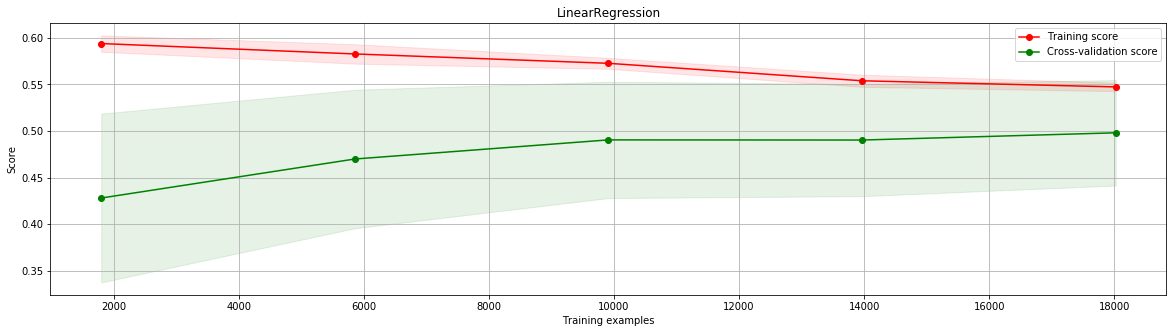

In [41]:
plot_learning_curve(LinearRegression(), "LinearRegression", X, y, cv=10, )

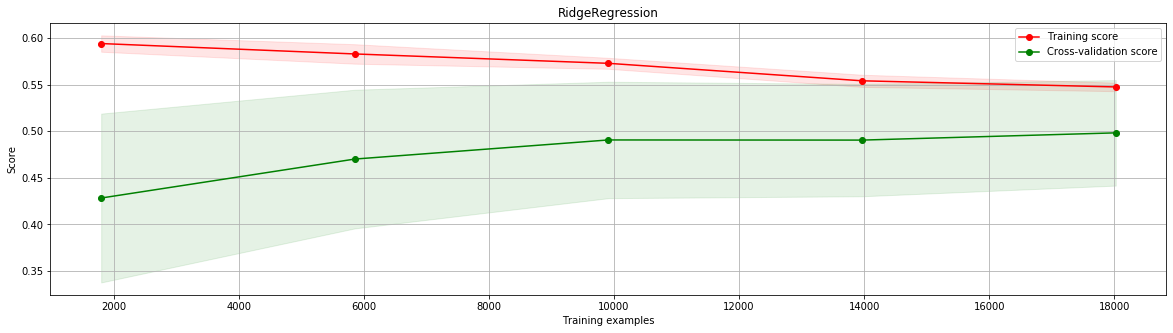

In [43]:
plot_learning_curve(Ridge(alpha=1.26), "RidgeRegression", X, y, cv=10)

C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22624742.768819857, tolerance: 13389.24434672586
  positive)
C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30472899.38821984, tolerance: 39918.94150136612
  positive)
C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6024689.728959978, tolerance: 66809.30556428211
  positive)
C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49884314.42730786, tolerance: 64012.462681121986
  positive)
C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15270368.432186961, tolerance: 90823.24907211801
  positive)
C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89779338.33496064, tolerance: 113012.9630005993
  positive)
C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

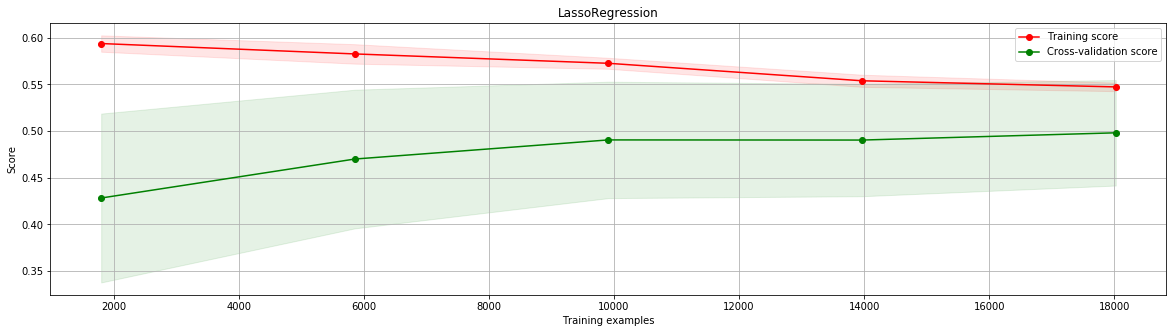

In [44]:
plot_learning_curve(Lasso(alpha=0.005), "LassoRegression", X, y, cv=10)

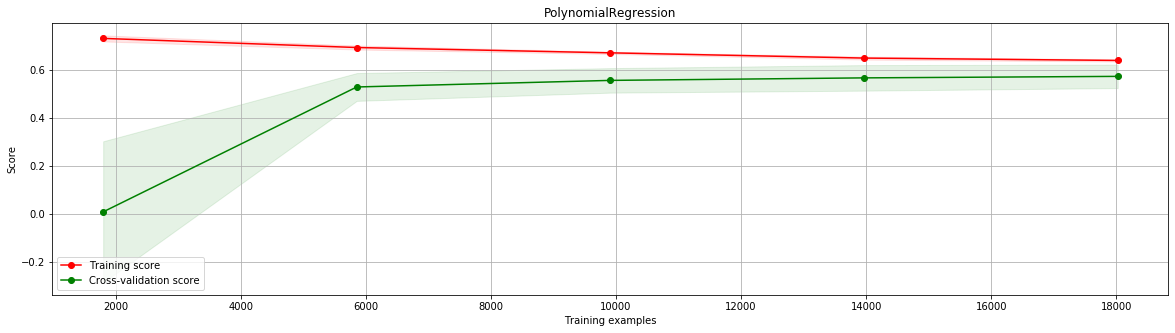

In [45]:
plot_learning_curve(poly_regression(degree=2), "PolynomialRegression", X, y, cv=10)